In [83]:
# Hotel Bookings Dataset - Data Preprocessing Summary
# ---------------------------------------------------
# 1. Load the dataset from a public GitHub CSV link.
# 2. Check for missing values:
#    - Replace missing values in numerical columns with the median.
#    - Replace missing values in categorical columns with the mode.
# 3. Detect and drop duplicate rows to avoid redundancy.
# 4. Handle outliers by applying appropriate techniques (e.g., capping, removing, or scaling).
# 5. Perform standard scaling on selected numerical columns 
#    (e.g., is_canceled, lead_time, arrival_date_year, arrival_date_month) 
#    to normalize the data for accurate analysis.
# 6. Convert categorical variables into numeric format using one-hot encoding 
#    (e.g., hotel, meal, country, room types, market segment, etc.).
# 7. Drop the original categorical columns after encoding to avoid redundancy.
# 8. Concatenate the dummy variables with the main DataFrame.
# 
# Result: A fully cleaned and preprocessed dataset with only numerical features,
# ready for data analytics tasks such as descriptive analysis, trend identification, and visualization.

In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [85]:
hotel_def = pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Yhills_July12_Analytics/refs/heads/main/hotel_bookings.csv")

In [86]:
hotel_def.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,07-01-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,07-01-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,07-02-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,07-02-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,07-03-2015


In [87]:
hotel_def.shape

(119390, 32)

In [88]:
hotel_def.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [89]:
hotel_def.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [90]:
# children float-4-> median/mean
# country- object-488-> mode
# agent- float- 16340-> median/mean
#company - float- 112593-> drop

In [91]:
hotel_def = hotel_def.drop("company", axis=1)
hotel_def.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,07-01-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,NaN,0,Transient,0.0,0,0,Check-Out,07-01-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,NaN,0,Transient,75.0,0,0,Check-Out,07-02-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,07-02-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,07-03-2015
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,07-03-2015
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,0,No Deposit,NaN,0,Transient,107.0,0,0,Check-Out,07-03-2015
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,0,No Deposit,303.0,0,Transient,103.0,0,1,Check-Out,07-03-2015
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,0,No Deposit,240.0,0,Transient,82.0,0,1,Canceled,05-06-2015
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,0,No Deposit,15.0,0,Transient,105.5,0,0,Canceled,4/22/2015


In [92]:
hotel_def["children"] = hotel_def["children"].astype(float)  # No '?' to replace , here missing value space is empty
hotel_def["agent"] = hotel_def["agent"].astype(float)  # we do not need to write this cuz these are already in float not in categorical form
hotel_def.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
91071,City Hotel,0,0,2016,June,25,16,0,1,2,...,0,No Deposit,NaN,0,Transient,119.0,0,1,Check-Out,6/17/2016
85388,City Hotel,0,42,2016,March,11,11,1,2,2,...,0,No Deposit,9.0,0,Transient,71.1,0,1,Check-Out,3/14/2016
29061,Resort Hotel,0,72,2016,October,43,16,2,2,1,...,0,No Deposit,243.0,0,Contract,54.0,0,0,Check-Out,10/20/2016
17731,Resort Hotel,0,287,2015,October,42,15,1,3,2,...,0,No Deposit,NaN,0,Transient-Party,44.5,0,0,Check-Out,10/19/2015
42596,City Hotel,0,14,2015,September,37,7,1,5,2,...,0,No Deposit,9.0,0,Contract,166.0,0,3,Check-Out,9/13/2015


In [93]:
median1 =hotel_def["children"].median()
median1

0.0

In [94]:
median2 =hotel_def["agent"].median()
median2

14.0

In [95]:
mean1 =hotel_def["children"].mean()
mean1

0.10388990333874994

In [96]:
mean2 =hotel_def["agent"].mean()
mean2

86.69338185346919

In [97]:
# replacing null value in numerical columns
hotel_def["children"] = hotel_def["children"].replace({np.nan: median1})
hotel_def["agent"] = hotel_def["agent"].replace({np.nan: median2})
hotel_def.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,07-01-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,07-01-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,14.0,0,Transient,75.0,0,0,Check-Out,07-02-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,07-02-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,07-03-2015


In [98]:
hotel_def.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
children                            0
babies                              0
meal                                0
country                           488
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
agent                               0
days_in_waiting_list                0
customer_type                       0
adr         

In [99]:
# replacing null value in categorical column
mode1 = hotel_def["country"].mode().values[0]
mode1

'PRT'

In [100]:
hotel_def["country"] = hotel_def["country"].replace(np.nan,mode1)

In [101]:
hotel_def.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [102]:
# check for duplicate data
duplicate = hotel_def.duplicated()
print(duplicate.sum())
hotel_def[duplicate ]

32020


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.00,0,1,Check-Out,07-03-2015
22,Resort Hotel,0,72,2015,July,27,1,2,4,2,...,1,No Deposit,250.0,0,Transient,84.67,0,1,Check-Out,07-07-2015
43,Resort Hotel,0,70,2015,July,27,2,2,3,2,...,0,No Deposit,250.0,0,Transient,137.00,0,1,Check-Out,07-07-2015
138,Resort Hotel,1,5,2015,July,28,5,1,0,2,...,0,No Deposit,240.0,0,Transient,97.00,0,0,Canceled,07-01-2015
200,Resort Hotel,0,0,2015,July,28,7,0,1,1,...,0,No Deposit,240.0,0,Transient,109.80,0,3,Check-Out,07-08-2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119349,City Hotel,0,186,2017,August,35,31,0,3,2,...,0,No Deposit,9.0,0,Transient,126.00,0,2,Check-Out,09-03-2017
119352,City Hotel,0,63,2017,August,35,31,0,3,3,...,0,No Deposit,9.0,0,Transient-Party,195.33,0,2,Check-Out,09-03-2017
119353,City Hotel,0,63,2017,August,35,31,0,3,3,...,0,No Deposit,9.0,0,Transient-Party,195.33,0,2,Check-Out,09-03-2017
119354,City Hotel,0,63,2017,August,35,31,0,3,3,...,0,No Deposit,9.0,0,Transient-Party,195.33,0,2,Check-Out,09-03-2017


In [103]:
# drop the duplicate
hotel_def.drop_duplicates(inplace=True)

In [104]:
dpl = hotel_def.duplicated()
dpl.sum()

0

In [105]:
hotel_def.shape

(87370, 31)

### Handling the outliers

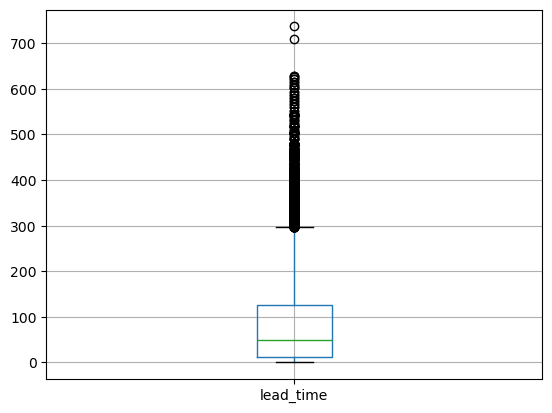

In [106]:
hotel_def.boxplot(column=["lead_time"])
plt.show()

In [107]:
def remove_outliers(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range,upper_range

In [108]:
lowlead_time,upplead_time=remove_outliers(hotel_def["lead_time"])
hotel_def["lead_time"]=np.where(hotel_def["lead_time"]>upplead_time,upplead_time,hotel_def["lead_time"])
hotel_def["lead_time"]=np.where(hotel_def["lead_time"]<lowlead_time,lowlead_time,hotel_def["lead_time"])

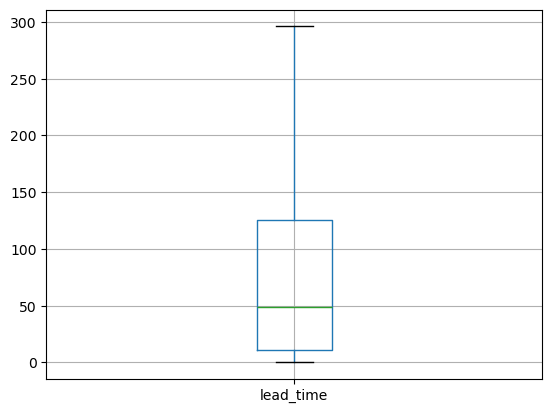

In [109]:
hotel_def.boxplot(column=["lead_time"])
plt.show()

### Normalizing and Scaling

In [110]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale 

StandardScaler()

In [111]:
# only int or float columns
hotel_def["is_canceled"] = std_scale.fit_transform(hotel_def[["is_canceled"]])
hotel_def["lead_time"] = std_scale.fit_transform(hotel_def[["lead_time"]])
hotel_def["arrival_date_year"] = std_scale.fit_transform(hotel_def[["arrival_date_year"]])
hotel_def["arrival_date_week_number"] = std_scale.fit_transform(hotel_def[["arrival_date_week_number"]])

In [112]:
hotel_def.head()
# here we are getting the value from -3 to 3 

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,-0.615833,2.684959,-1.763984,July,0.011736,1,0,0,2,...,3,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,07-01-2015
1,Resort Hotel,-0.615833,2.684959,-1.763984,July,0.011736,1,0,0,2,...,4,No Deposit,14.0,0,Transient,0.0,0,0,Check-Out,07-01-2015
2,Resort Hotel,-0.615833,-0.880737,-1.763984,July,0.011736,1,0,1,1,...,0,No Deposit,14.0,0,Transient,75.0,0,0,Check-Out,07-02-2015
3,Resort Hotel,-0.615833,-0.806709,-1.763984,July,0.011736,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,07-02-2015
4,Resort Hotel,-0.615833,-0.794371,-1.763984,July,0.011736,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,07-03-2015


In [113]:
# for categorical data to convert to dummies
dummies = pd.get_dummies(hotel_def[["hotel", "arrival_date_month", "meal", "market_segment", "country", "distribution_channel", 
            "reserved_room_type", "assigned_room_type", "deposit_type", "customer_type", "reservation_status", "reservation_status_date"]],
            columns=["hotel", "arrival_date_month", "meal", "market_segment", "country", "distribution_channel", 
            "reserved_room_type", "assigned_room_type", "deposit_type", "customer_type", "reservation_status", 
            "reservation_status_date"]).astype(int) 

In [114]:
dummies.head()

,hotel_City Hotel,hotel_Resort Hotel,arrival_date_month_April,arrival_date_month_August,arrival_date_month_December,arrival_date_month_February,arrival_date_month_January,arrival_date_month_July,arrival_date_month_June,arrival_date_month_March,...,reservation_status_date_9/26/2015,reservation_status_date_9/26/2016,reservation_status_date_9/27/2015,reservation_status_date_9/27/2016,reservation_status_date_9/28/2015,reservation_status_date_9/28/2016,reservation_status_date_9/29/2015,reservation_status_date_9/29/2016,reservation_status_date_9/30/2015,reservation_status_date_9/30/2016
0,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
columns=["hotel", "arrival_date_month", "meal", "market_segment", "country", "distribution_channel", 
            "reserved_room_type", "assigned_room_type", "deposit_type", "customer_type", "reservation_status", 
            "reservation_status_date"]

# Drop original categorical columns
hotel_def.drop(columns, axis=1, inplace=True)

# Concatenate dummies to the remaining data
hotel_def = pd.concat([hotel_def, dummies], axis=1)

In [116]:
hotel_def.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,reservation_status_date_9/26/2015,reservation_status_date_9/26/2016,reservation_status_date_9/27/2015,reservation_status_date_9/27/2016,reservation_status_date_9/28/2015,reservation_status_date_9/28/2016,reservation_status_date_9/29/2015,reservation_status_date_9/29/2016,reservation_status_date_9/30/2015,reservation_status_date_9/30/2016
0,-0.615833,2.684959,-1.763984,0.011736,1,0,0,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.615833,2.684959,-1.763984,0.011736,1,0,0,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.615833,-0.880737,-1.763984,0.011736,1,0,1,1,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.615833,-0.806709,-1.763984,0.011736,1,0,1,1,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.615833,-0.794371,-1.763984,0.011736,1,0,2,2,0.0,0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
hotel_def.columns

Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies',
       ...
       'reservation_status_date_9/26/2015',
       'reservation_status_date_9/26/2016',
       'reservation_status_date_9/27/2015',
       'reservation_status_date_9/27/2016',
       'reservation_status_date_9/28/2015',
       'reservation_status_date_9/28/2016',
       'reservation_status_date_9/29/2015',
       'reservation_status_date_9/29/2016',
       'reservation_status_date_9/30/2015',
       'reservation_status_date_9/30/2016'],
      dtype='object', length=1186)

In [118]:
hotel_def.dtypes

is_canceled                          float64
lead_time                            float64
arrival_date_year                    float64
arrival_date_week_number             float64
arrival_date_day_of_month              int64
                                      ...   
reservation_status_date_9/28/2016      int32
reservation_status_date_9/29/2015      int32
reservation_status_date_9/29/2016      int32
reservation_status_date_9/30/2015      int32
reservation_status_date_9/30/2016      int32
Length: 1186, dtype: object

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [120]:
# independent variables
x = hotel_def.drop("is_canceled", axis=1)
y = hotel_def[["is_canceled"]]

In [121]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [122]:
#You're trying to train a classification model (LogisticRegression) but your target (y_train) contains continuous values (like 2.3, 5.6, etc.),
#which are meant for regression, not classification.
# so we fix it by-

In [123]:
#Step 1: Check your target variable (y_train)
print(set(y_train))
print(type(y_train[0]))

{'is_canceled'}


KeyError: 0

In [ ]:
#Step 2: Convert target to numeric labels

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [ ]:
#Step 3: Check if any labels are still floats

y_train = [1 if y > 0.5 else 0 for y in y_train]

In [ ]:
#Final Check:
reg_model = LogisticRegression()
reg_model.fit(x_train, y_train)

In [ ]:
reg_model.score(x_train, y_train)

In [ ]:
reg_model.score( x_test, y_test)

In [ ]:
predictions=reg_model.predict(x_test)

In [ ]:
from sklearn import metrics 
print(metrics.classification_report(y_test,predictions))

In [ ]:
cm = metrics.confusion_matrix(y_test, predictions, labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                   columns = [i for i in ["Predict 1","Predict 0"]])
plt.close('all')  # 🔄 Clear previous plots
plt.figure(figsize=(7,5))
(sns.heatmap(df_cm, annot=True, fmt="g"))
plt.show()